In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df_bike = pd.read_csv('bike_rental.csv')

In [3]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


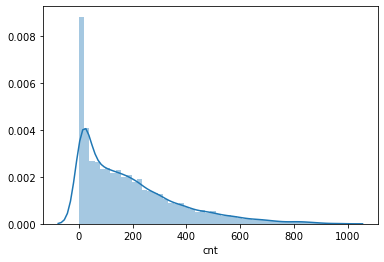

In [5]:
sns.distplot(df_bike.cnt);

In [6]:
correlation_count = df_bike.corr()['cnt']
correlation_count

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

---

Remover colunas desnecessarias 

In [7]:
columns = df_bike.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

---

### Split dos dados

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_bike[columns], df_bike['cnt'], test_size=0.20, random_state=30)

---

## LinearRegression

In [14]:
linear_regression = LinearRegression()
linear_model = linear_regression.fit(X_train, y_train)

In [15]:
predict_test = linear_model.predict(X_test)
mean_test = mean_squared_error(y_test, predict_test)
score_test = linear_model.score(X_test, y_test)

print('test:')
print('mean squared error:', mean_test)
print('score:', score_test)

test:
mean squared error: 19523.25295729996
score: 0.3847024731859713


In [16]:
predict_train = linear_model.predict(X_train)
mean_train = mean_squared_error(y_train, predict_train)
score_train = linear_model.score(X_train, y_train)

print('train:')
print('mean squared error:', mean_train)
print('score:', score_train)

train:
mean squared error: 20251.85800345895
score: 0.3898072525487585


---

## RandomForestRegression

In [17]:
random_forest = RandomForestRegressor()
rfr_model = random_forest.fit(X_train, y_train)

In [18]:
predict_test = rfr_model.predict(X_test)
mean_test = mean_squared_error(y_test, predict_test)
score_test = linear_model.score(X_test, y_test)

print('test:')
print('mean squared error:', mean_test)
print('score:', score_test)

test:
mean squared error: 1927.6877195051784
score: 0.3847024731859713


In [19]:
predict_train = linear_model.predict(X_train)
mean_train = mean_squared_error(y_train, predict_train)
score_train = linear_model.score(X_train, y_train)

print('train:')
print('mean squared error:', mean_train)
print('score:', score_train)

train:
mean squared error: 20251.85800345895
score: 0.3898072525487585


---

## GridSearchRegressor

In [21]:
...

Ellipsis